In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
from sklearn.metrics import accuracy_score,confusion_matrix,r2_score

In [4]:
data =pd.read_csv('placementdata.csv')

In [5]:
df=pd.DataFrame(data)

In [6]:
df.shape

(10000, 12)

In [7]:
df.sample(10)

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
9020,9021,7.5,1,1,0,82,4.5,No,Yes,62,72,NotPlaced
1310,1311,6.6,1,1,0,73,3.9,No,No,63,62,NotPlaced
2322,2323,7.5,0,1,1,71,4.4,Yes,Yes,79,74,NotPlaced
7333,7334,8.3,1,3,2,90,4.8,Yes,Yes,75,85,Placed
6909,6910,8.5,2,3,2,90,4.8,Yes,Yes,76,82,Placed
6950,6951,7.5,1,1,1,67,3.8,No,No,59,63,NotPlaced
7839,7840,7.7,1,1,1,71,4.2,No,No,71,59,NotPlaced
9129,9130,8.5,2,1,0,86,4.7,Yes,Yes,64,83,NotPlaced
8,9,6.5,1,1,0,84,3.9,No,Yes,75,71,NotPlaced
7357,7358,8.1,1,3,0,87,4.7,Yes,Yes,83,85,Placed


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
encoder=LabelEncoder()
df['PlacementStatus']=encoder.fit_transform(df['PlacementStatus'])

In [30]:
extraciract=[['Yes','No']]
encoder=OrdinalEncoder(categories=extraciract)
df['ExtracurricularActivities_encoded']=encoder.fit_transform(df[['ExtracurricularActivities']])
#df.drop('ExtracurricularActivities',axis=1,inplace=True)
# cols=list(df.columns)
# cols[9],cols[11]=cols[11],cols[10]
# df=df[cols]
# df


KeyError: "None of [Index(['ExtracurricularActivities'], dtype='object')] are in the [columns]"

In [8]:
encoder=LabelEncoder()
df['PlacementTraining']=encoder.fit_transform(df['PlacementTraining'])

<Axes: xlabel='PlacementStatus'>

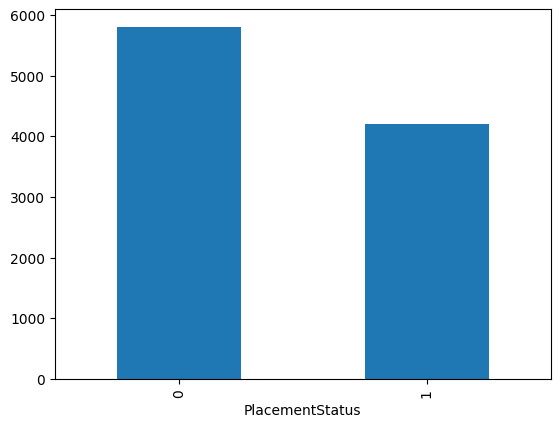

In [9]:
df['PlacementStatus'].value_counts().plot(kind='bar')

<Axes: xlabel='Internships'>

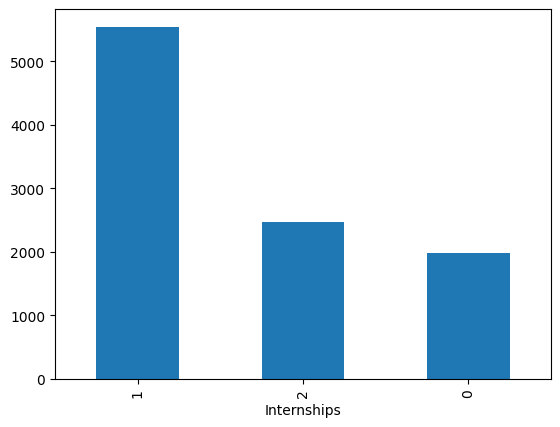

In [13]:
df['Internships'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

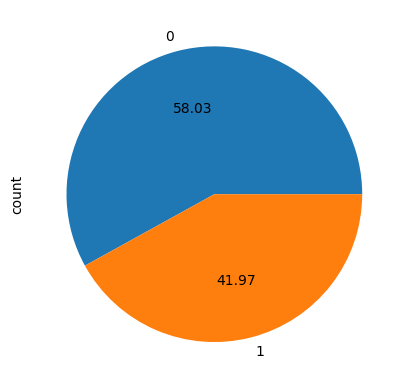

In [21]:
df['PlacementStatus'].value_counts().plot(kind='pie',autopct='%.2f')

<Axes: xlabel='CGPA', ylabel='Count'>

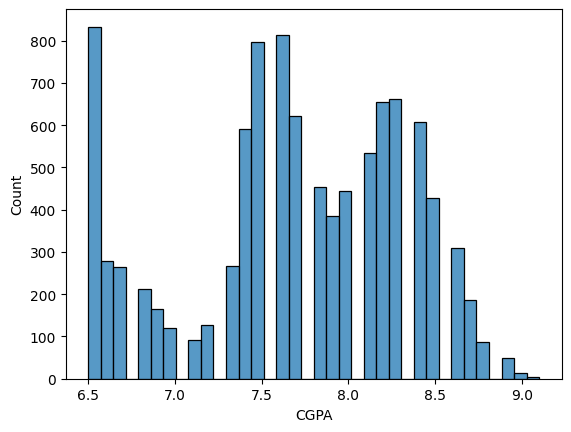

In [10]:
sns.histplot(df['CGPA'])

<Axes: xlabel='PlacementStatus', ylabel='CGPA'>

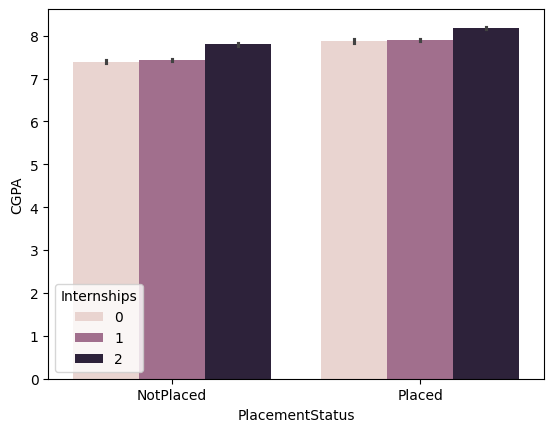

In [38]:
sns.barplot(x=df['PlacementStatus'],y=df['CGPA'],data=df,hue=df['Internships'])

<Axes: xlabel='PlacementStatus', ylabel='CGPA'>

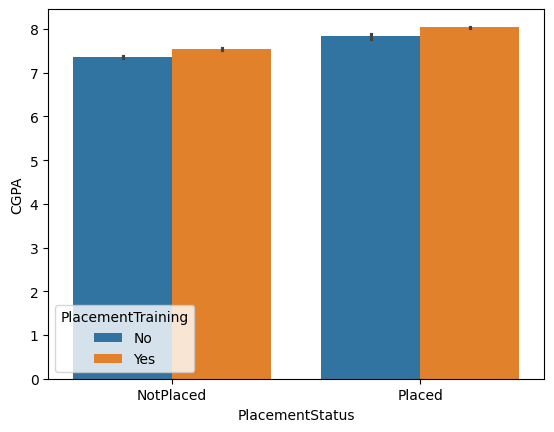

In [41]:
sns.barplot(x=df['PlacementStatus'],y=df['CGPA'],data=df,hue=df['PlacementTraining'])

<Axes: xlabel='PlacementStatus', ylabel='CGPA'>

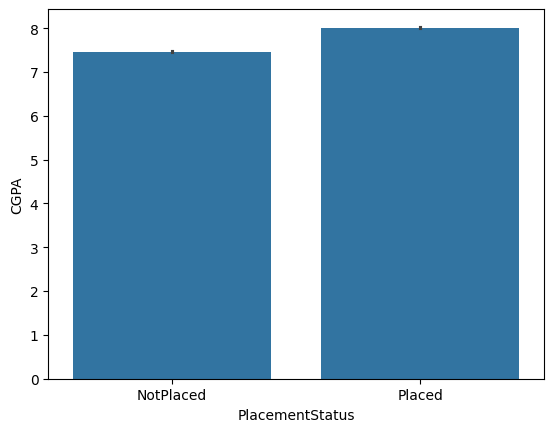

In [37]:
sns.barplot(x=df['PlacementStatus'],y=df['CGPA'],data=df)

<Axes: ylabel='CGPA'>

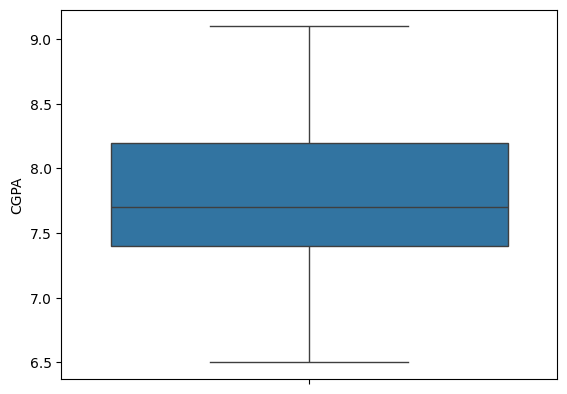

In [28]:
sns.boxplot(df['CGPA'])

In [ ]:
sns.boxplot(df['Fare'])

In [ ]:
df['CGPA'].corr(df['AptitudeTestScore'])

np.float64(0.42313142379333163)

In [24]:
df['Internships'].corr(df['AptitudeTestScore'])

np.float64(0.3207251047696935)

In [25]:
df['Projects'].corr(df['AptitudeTestScore'])

np.float64(0.5403394722400783)

In [26]:
df['SSC_Marks'].corr(df['AptitudeTestScore'])

np.float64(0.5130438762802517)

In [27]:
df['HSC_Marks'].corr(df['AptitudeTestScore'])

np.float64(0.5651046797328835)

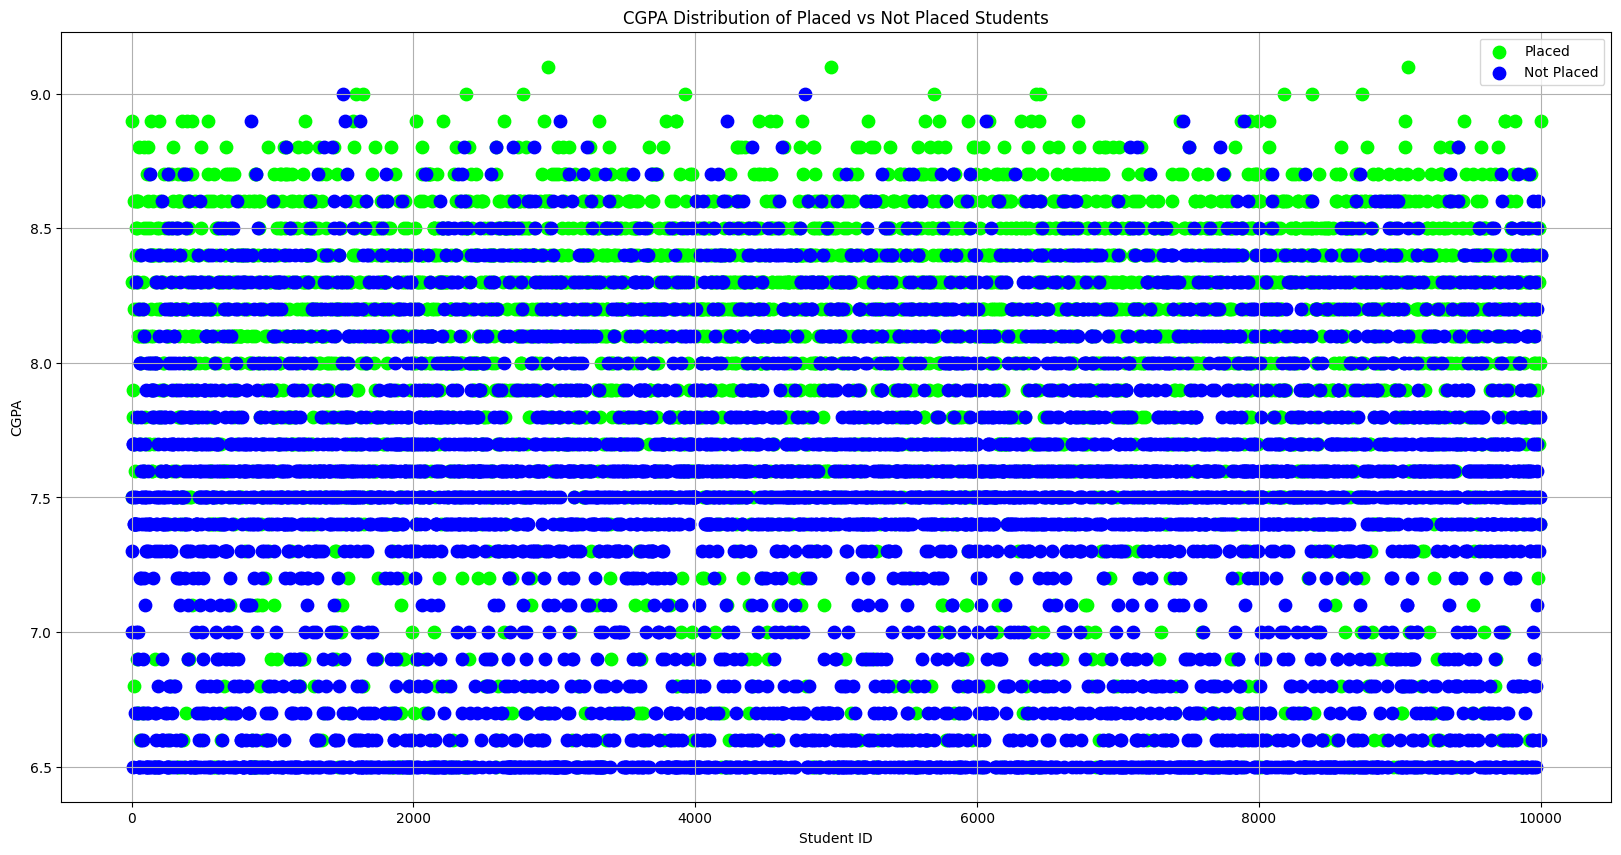

In [ ]:
placed = df[df['PlacementStatus'] == 1]
not_placed = df[df['PlacementStatus'] == 0]
plt.figure(figsize=(20,10))

# Scatter points for placed and not placed
plt.scatter(placed['StudentID'], placed['CGPA'], color='lime', label='Placed', s=80)
plt.scatter(not_placed['StudentID'], not_placed['CGPA'], color='blue', label='Not Placed', s=80)

plt.xlabel('Student ID')
plt.ylabel('CGPA')
plt.title('CGPA Distribution of Placed vs Not Placed Students')
plt.legend()
plt.grid(True)
plt.show()

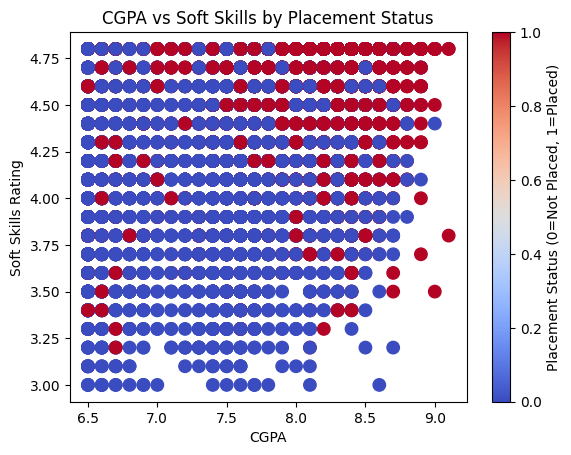

In [ ]:
plt.scatter(df['CGPA'], df['SoftSkillsRating'], c=df['PlacementStatus'], cmap='coolwarm', s=80)
plt.xlabel('CGPA')
plt.ylabel('Soft Skills Rating')
plt.title('CGPA vs Soft Skills by Placement Status')
plt.colorbar(label='Placement Status (0=Not Placed, 1=Placed)')
plt.show()

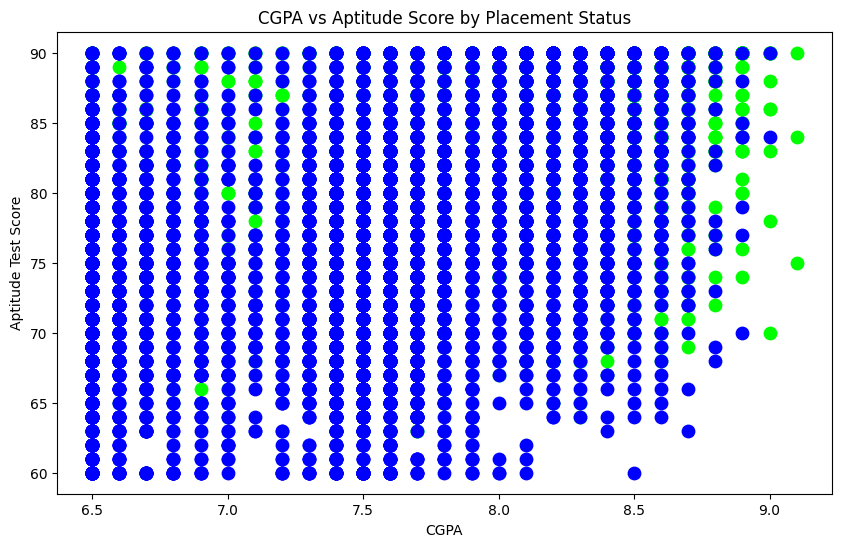

In [20]:
placed = df[df['PlacementStatus'] == 1]
not_placed = df[df['PlacementStatus'] == 0]

plt.figure(figsize=(10,6))
plt.scatter(placed['CGPA'], placed['AptitudeTestScore'], color='lime', label='Placed', s=80)
plt.scatter(not_placed['CGPA'], not_placed['AptitudeTestScore'], color='blue', label='Not Placed', s=80)

plt.xlabel('CGPA')
plt.ylabel('Aptitude Test Score')
plt.title('CGPA vs Aptitude Score by Placement Status')
plt.show()

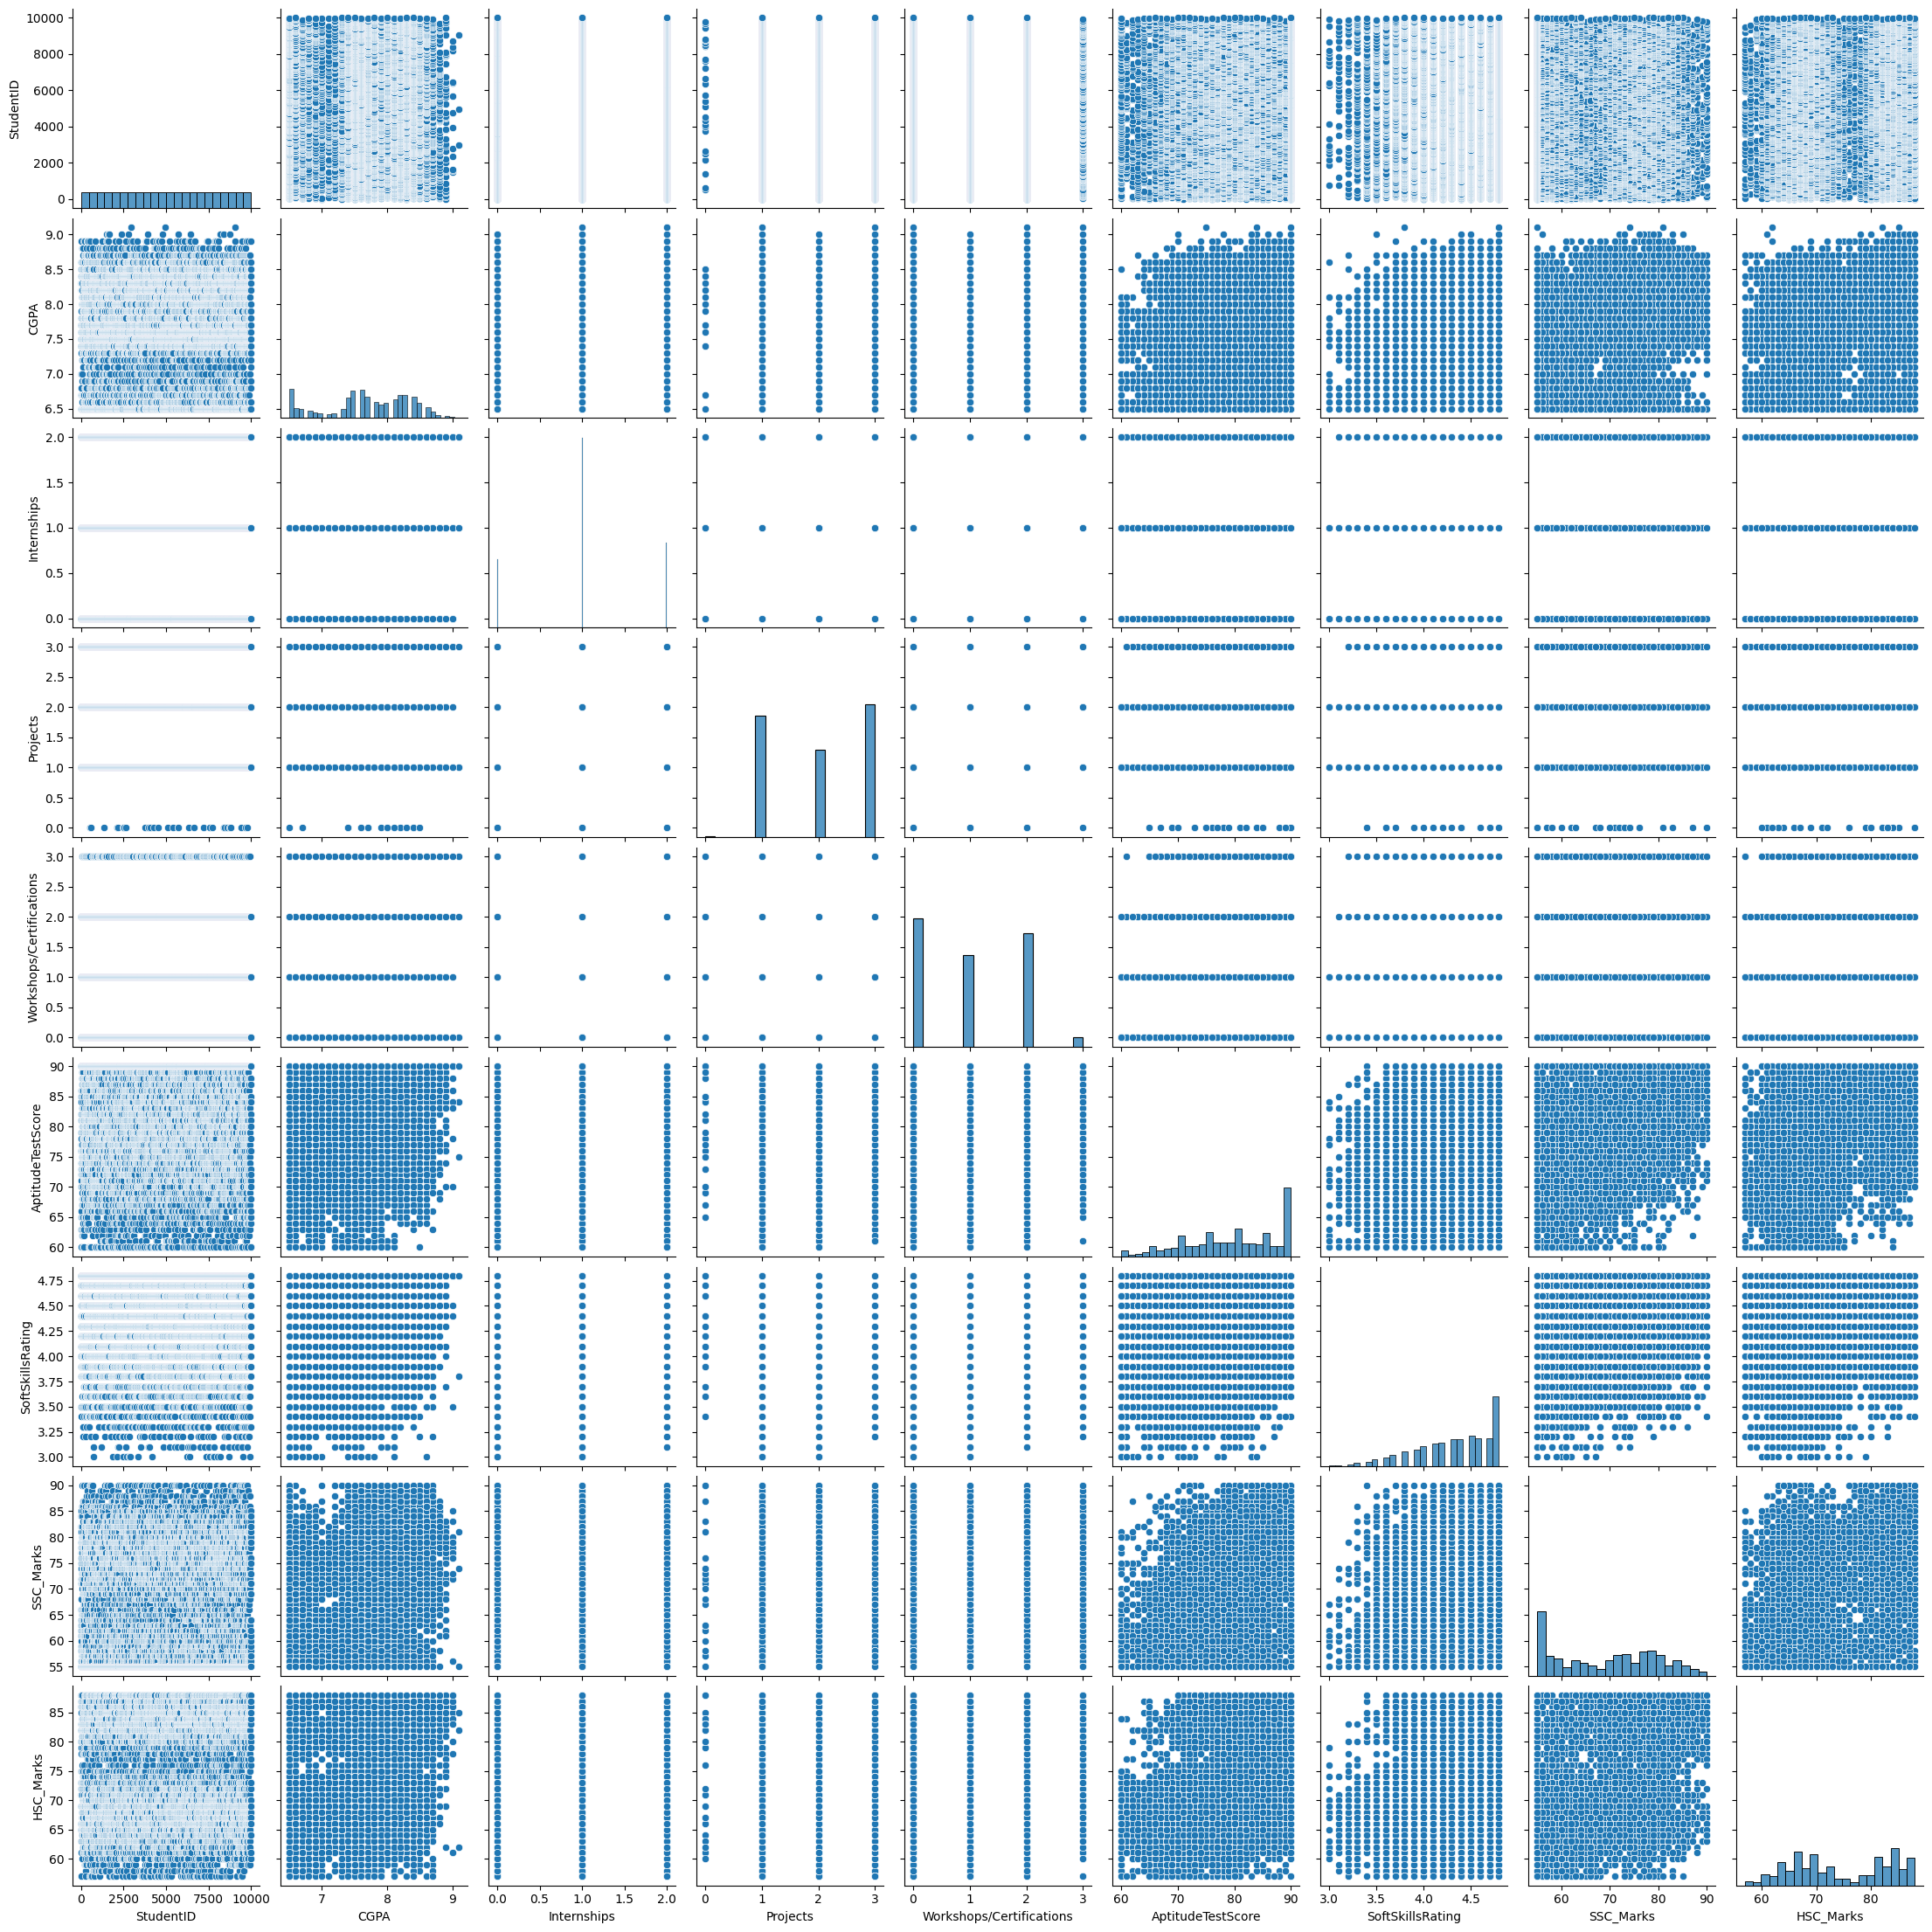

In [42]:
sns.pairplot(df)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  int64  
 8   PlacementTraining          10000 non-null  int64  
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [47]:
df.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,0.585400,0.731800,69.159400,74.501500,0.419700
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,0.492677,0.443044,10.430459,8.919527,0.493534
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,0.000000,0.000000,55.000000,57.000000,0.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,0.000000,0.000000,59.000000,67.000000,0.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,1.000000,1.000000,70.000000,73.000000,0.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,1.000000,1.000000,78.000000,83.000000,1.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,1.000000,1.000000,90.000000,88.000000,1.000000


In [34]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


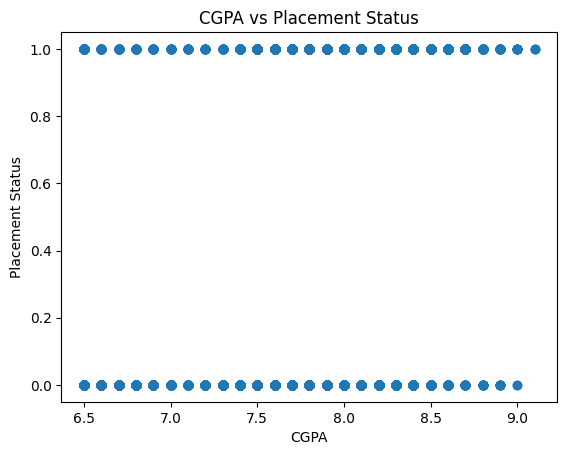

In [35]:
plt.scatter(df['CGPA'], df['PlacementStatus'])
plt.xlabel('CGPA')
plt.ylabel('Placement Status')
plt.title('CGPA vs Placement Status')
plt.show()

In [48]:
x=df.iloc[:,1:11]
y=df.iloc[:,-1]

In [49]:
x

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,61,79
1,8.9,0,3,2,90,4.0,1,1,78,82
2,7.3,1,2,2,82,4.8,1,0,79,80
3,7.5,1,1,2,85,4.4,1,1,81,80
4,8.3,1,2,2,86,4.5,1,1,74,88
...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66
9996,7.4,0,1,0,90,4.8,0,0,84,67
9997,8.4,1,3,0,70,4.8,1,1,79,81
9998,8.9,0,3,2,87,4.8,1,1,71,85


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [51]:
clf=LogisticRegression()

In [52]:
x

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,7.5,1,1,1,65,4.4,0,0,61,79
1,8.9,0,3,2,90,4.0,1,1,78,82
2,7.3,1,2,2,82,4.8,1,0,79,80
3,7.5,1,1,2,85,4.4,1,1,81,80
4,8.3,1,2,2,86,4.5,1,1,74,88
...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66
9996,7.4,0,1,0,90,4.8,0,0,84,67
9997,8.4,1,3,0,70,4.8,1,1,79,81
9998,8.9,0,3,2,87,4.8,1,1,71,85


In [53]:
clf.fit(x_train,y_train)

c:\Program Files\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [57]:
ypred=clf.predict(x_test)

In [56]:
accuracy_score(y_test,ypred)

0.796

In [44]:
r2_score(y_test,ypred)

0.15521931298616765